In [1]:
from RAT_env import *
from NashAgent_lib import *
from NashRL import *
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import csv


Initialize enviroment for the training

c:\Users\alvar\Documents\TELECO\cuarto\Thesis\Nash_DQN_RAT\RAT_env.py:347: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(position[0], position[1], c=color, label=f'User (RAT {rat})', s=10)


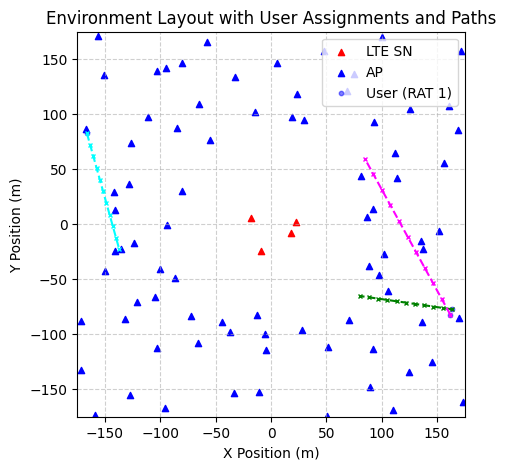

In [2]:
# Parameters for the Multi-RAT Network
user_area_width = 100
ltesn_area_width = 50
n_aps = 81
n_users = 3
cqi_dataset = pd.read_csv("cqi_distance.csv")
rssi_dataset = pd.read_csv("rssi_distance.csv")

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

rat_env = Multi_RAT_Network(user_area_width, ltesn_area_width, n_users, n_aps, cqi_dataset, rssi_dataset, plot=True)

Train the Nash Agent

In [3]:
import time
from datetime import date

start = time.time()

str_dt = date.today().strftime("%d%m%Y")
nash_agent, loss_data, last_rats, episode_rewards= \
    run_Nash_Agent(rat_env, max_steps=10, nash_agent=None, num_sim=1000,
                    AN_file_name="Action_Net", VN_file_name="Value_Net",
                    rv_min=.01, rv_max=2.5, path='/pt_files/Nash_DQN/',
                    early_stop=False, early_lim=1000, mini_batch=10)

print("Total time taken: ")
print(time.time() - start)

Iteration 0.0 to 200. Total Steps = 2017. Total stations selected = 6051(APs + LTEs)

APs were selected 5456 times across 2015 steps. In 2010 steps we had disconnection 
Only 76 APs didn´t got negative reward(user connected)
--> 79.44% of APs selected randomly | 20.56% selected by the NN as best action
--> 81.49% of disconnections are from random actions | 18.51% from best actions

LTE were selected 595 times across 529 steps
--> 100.00% selected randomly | 0.00% selected by the NN as best action

-----------------------------------------------------------------
Iteration 200.0 to 400. Total Steps = 2030. Total stations selected = 6090(APs + LTEs)

APs were selected 5244 times across 2015 steps. In 2000 steps we had disconnection 
Only 116 APs didn´t got negative reward(user connected)
--> 61.52% of APs selected randomly | 38.48% selected by the NN as best action
--> 66.20% of disconnections are from random actions | 33.80% from best actions

LTE were selected 846 times across 696 step

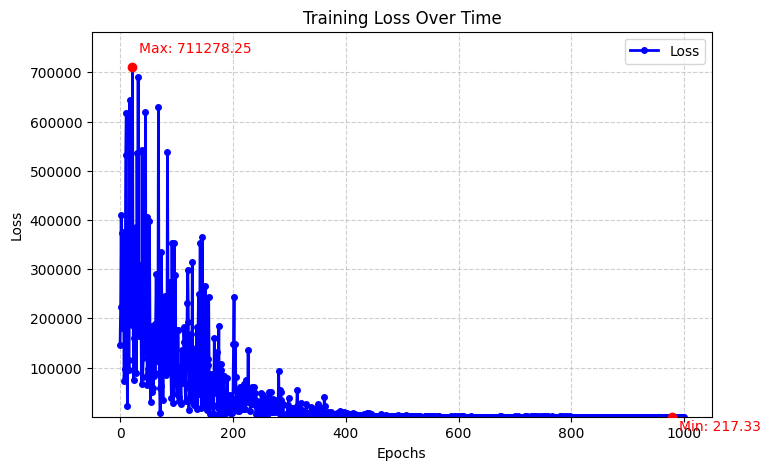

In [4]:
plt.figure(figsize=(8, 5)) 

plt.plot(loss_data, label="Loss", color="blue", linewidth=2, marker="o", markersize=4)

plt.ylim(np.min(loss_data) * 0.9, np.max(loss_data) * 1.1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

min_idx = np.argmin(loss_data)
max_idx = np.argmax(loss_data)

plt.scatter([min_idx, max_idx], [loss_data[min_idx], loss_data[max_idx]], color="red", zorder=3)
plt.annotate(f"Min: {loss_data[min_idx]:.2f}", (min_idx, loss_data[min_idx]), 
             textcoords="offset points", xytext=(5, -10), ha="left", color="red")
plt.annotate(f"Max: {loss_data[max_idx]:.2f}", (max_idx, loss_data[max_idx]), 
             textcoords="offset points", xytext=(5, 10), ha="left", color="red")

plt.show()


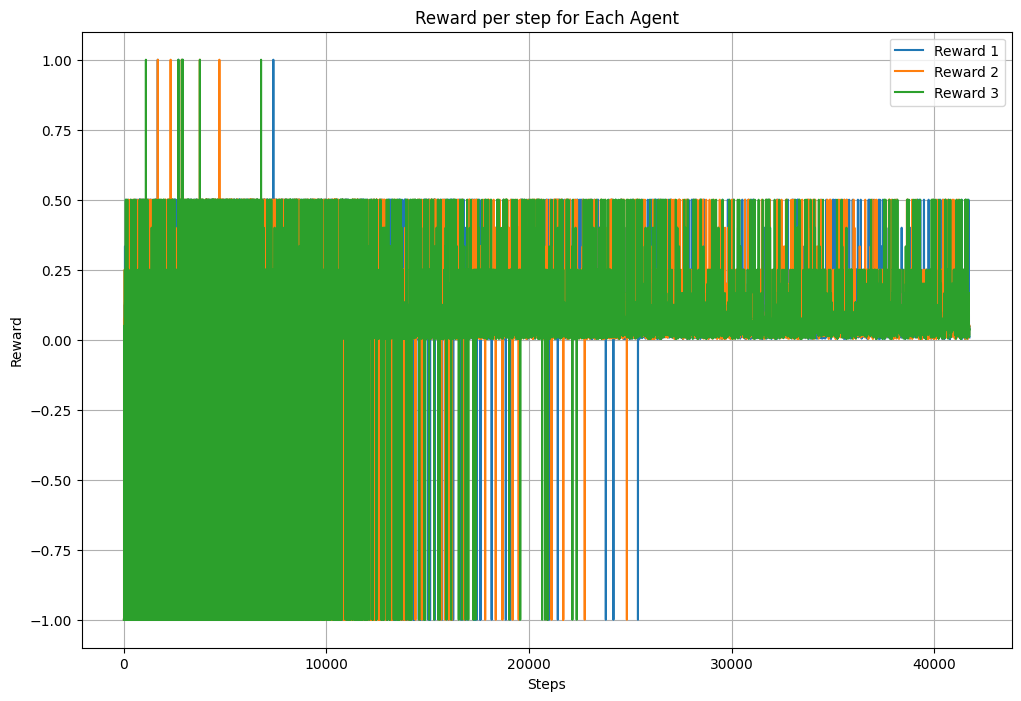

In [5]:
steps = []
rewards = [[] for _ in range(n_users)]

with open('rewards.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        steps.append(int(row["step"]) + 1)
        for j in range(n_users):
            rewards[j].append(float(row[f"reward_{j+1}"]))

plt.figure(figsize=(12, 8))

agents_plotted = n_users
for j in range(agents_plotted):
    plt.plot(steps, rewards[j], label=f"Reward {j+1}")
    
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.title("Reward per step for Each Agent")
plt.legend()
plt.grid()
plt.show()

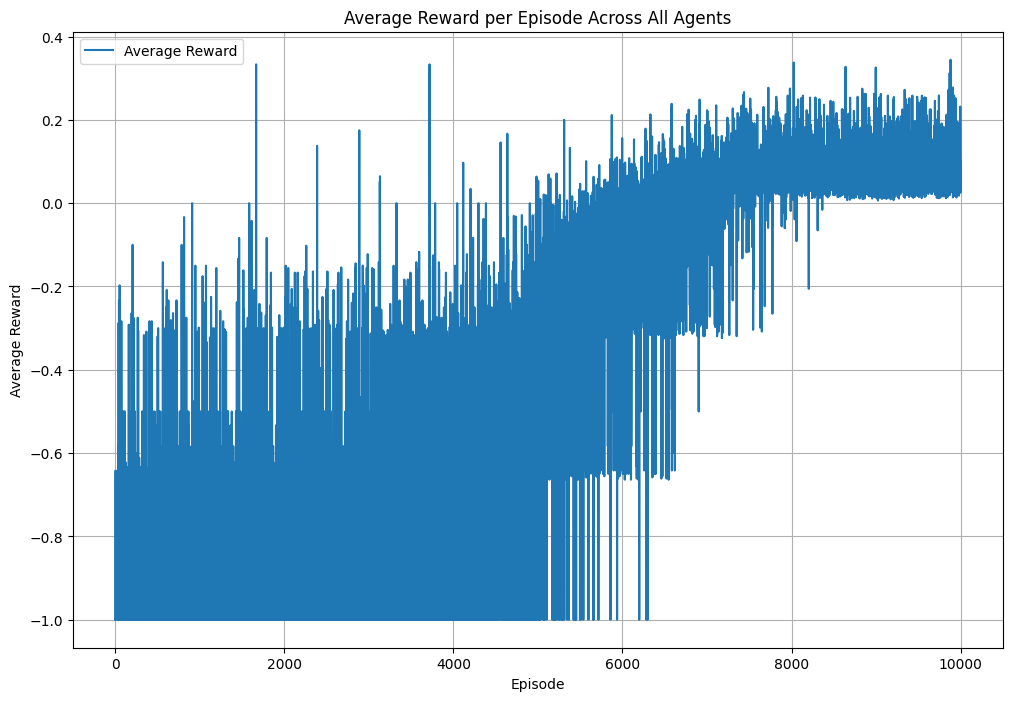

In [6]:
episode_rewards = np.array(episode_rewards)

# Calculate the average reward across all agents for each episode
average_rewards = np.mean(episode_rewards, axis=1)

plt.figure(figsize=(12, 8))

# Plot the average reward per episode across all agents
plt.plot(range(episode_rewards.shape[0]), average_rewards, label="Average Reward")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Average Reward per Episode Across All Agents")
plt.legend()
plt.grid()
plt.show()

Reward for each agent

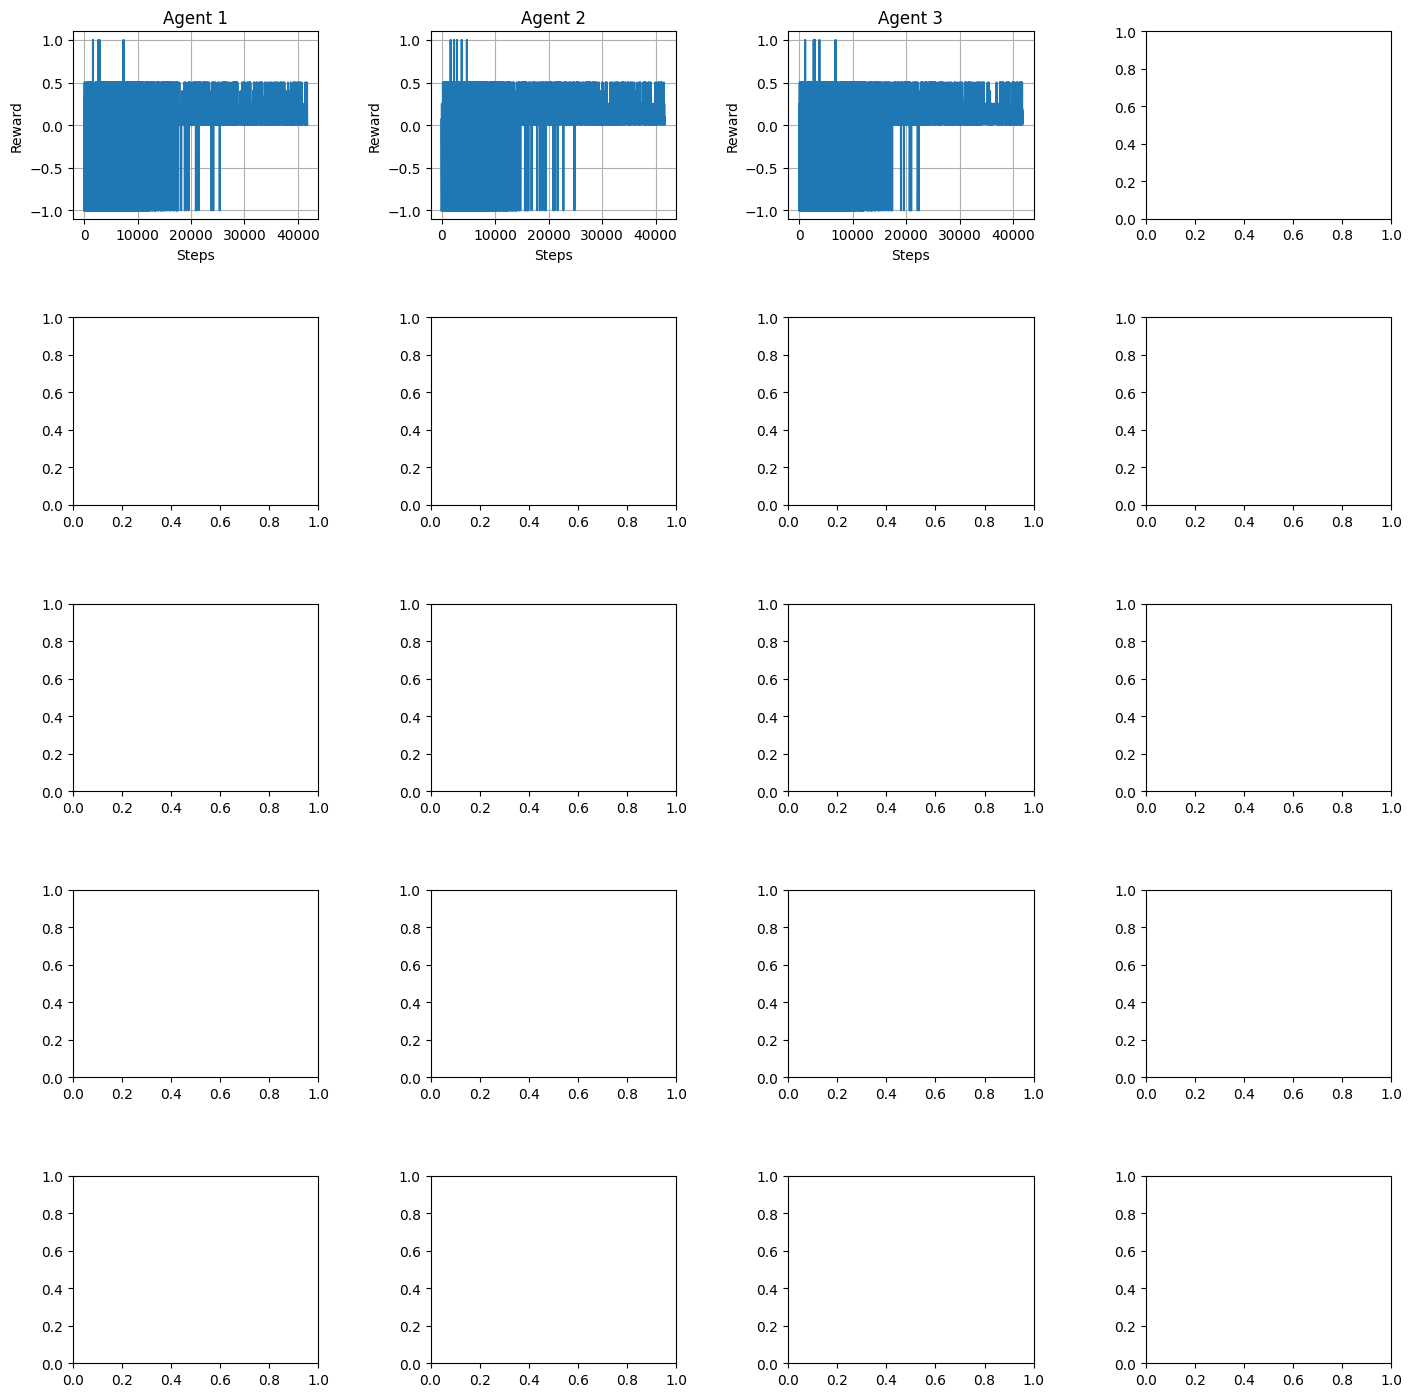

In [7]:
steps = []
rewards = [[] for _ in range(n_users)]  # Adjusting to 20 agents

# Read rewards data from the CSV file
with open('rewards.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        steps.append(int(row["step"]) + 1)
        for j in range(n_users):  # Loop over 20 agents
            rewards[j].append(float(row[f"reward_{j+1}"]))

# Create a 5x4 grid of subplots for 20 agents
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
fig.tight_layout(pad=5.0)  # Add space between plots

# Flatten the 2D axes array to make it easier to loop through
axes = axes.flatten()

# Plot rewards for each agent in its own subplot
for j in range(n_users):
    ax = axes[j]
    ax.plot(steps, rewards[j])
    ax.set_title(f"Agent {j+1}")
    ax.set_xlabel("Steps")
    ax.set_ylabel("Reward")
    ax.grid(True)

plt.show()

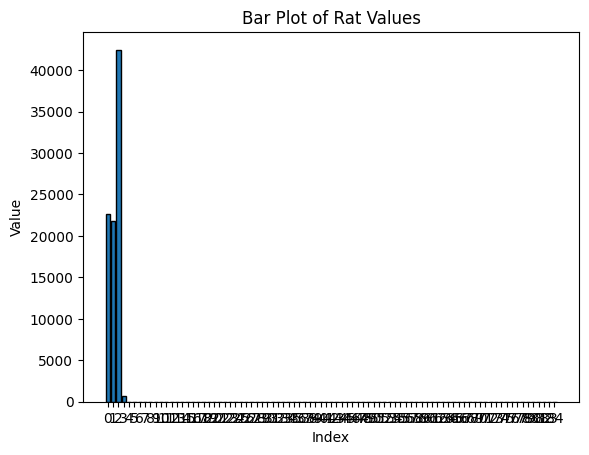

In [8]:
plt.bar(range(len(last_rats)), last_rats, edgecolor='black')

plt.xlabel('Index')
plt.xticks(range(len(last_rats))) 
plt.ylabel('Value')
plt.title('Bar Plot of Rat Values')

plt.show()